In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install numpy opencv-python pillow tensorflow keras imutils scikit-learn matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns

In [ ]:
SIZE = 128 #img size

In [ ]:
# Read input images and assign labels based on folder names

train_path = os.path.join("/content/drive/MyDrive/Malware/virus_share_lbp/train/*")

#Capture training data and labels into respective lists
train_images = []
train_labels = []

for directory_path in glob.glob(train_path):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

#Convert lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

onlinegames
renos
startpage
vundo
vobfus
zbot
obfuscator
winwebsec
rbot
zeroaccess
delfinject
lolyda
cycbot
bho
ceeinject
hotbar
adload
fakerean
alureon
agent


In [ ]:
print(len(train_images))
print(len(train_labels))

21160
21160


**Open a dir**

In [ ]:
# Read input images and assign labels based on folder names

test_path = os.path.join("/content/drive/MyDrive/Malware/virus_share_lbp/test/*")

#Capture training data and labels into respective lists
test_images = []
test_labels = []

for directory_path in glob.glob(test_path):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

#Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

startpage
winwebsec
zbot
obfuscator
vobfus
onlinegames
rbot
zeroaccess
renos
vundo
cycbot
hotbar
agent
fakerean
delfinject
bho
ceeinject
alureon
adload
lolyda


In [ ]:
folders = ['adload', 'agent', 'alureon', 'bho', 'ceeinject', 'cycbot', 'delfinject', 'fakerean', 'hotbar', 'lolyda', 'obfuscator', 'rbot', 'onlinegames', 'renos', 'startpage', 'vobfus', 'vundo', 'winwebsec', 'zbot', 'zeroaccess']

In [ ]:
print(len(test_images))
print(len(test_labels))

5292
5292


In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [ ]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [ ]:
from sklearn.model_selection import train_test_split
x_val, x_test_1, y_val, y_test1 = train_test_split(x_test, y_test, train_size=0.5, random_state=10)

In [ ]:
###################################################################
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
x_val= x_val / 255.0

In [ ]:
#One hot encode y values for neural network.
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
y_val_one_hot = to_categorical(y_val)

In [ ]:
from keras.applications import ResNet50

In [ ]:
#############################
#Load model wothout classifier/fully connected layers
resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(SIZE,SIZE,3))

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
resnet.summary()  #Trainable parameters will be 0

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
#Now, let us use features from convolutional network
feature_extractor=resnet.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_features = features #This is our X input

662/662 [==============================] - 27s 29ms/step


**XGBoost**

In [ ]:
#XGboost
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators=50, random_state=42)

In [ ]:
xgb_model.fit(X_features, y_train) #For sklearn no one hot encoding

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
#Send test data through same feature extractor process
X_test_feature = resnet.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

166/166 [==============================] - 6s 34ms/step


In [ ]:
prediction_xgb = xgb_model.predict(X_test_features)
prediction_xgb= le.inverse_transform(prediction_xgb)


In [ ]:
#Print overall accuracy
from sklearn import metrics
print("Accuracy XGBOOST= ", metrics.accuracy_score(test_labels, prediction_xgb))

Accuracy XGBOOST=  0.9911186696900982


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(test_labels, prediction_xgb))

              precision    recall  f1-score   support

      adload       1.00      1.00      1.00       210
       agent       0.99      0.99      0.99       169
     alureon       1.00      1.00      1.00       266
         bho       1.00      1.00      1.00       236
   ceeinject       0.99      1.00      0.99       179
      cycbot       1.00      0.99      1.00       206
  delfinject       0.97      0.99      0.98       230
    fakerean       0.99      0.95      0.97       213
      hotbar       0.99      0.98      0.99       299
      lolyda       1.00      1.00      1.00       183
  obfuscator       0.97      0.99      0.98       289
 onlinegames       1.00      1.00      1.00       259
        rbot       0.99      0.95      0.97       204
       renos       0.99      1.00      0.99       263
   startpage       0.98      0.98      0.98       228
      vobfus       0.99      0.99      0.99       186
       vundo       0.99      1.00      1.00       359
   winwebsec       0.99    

[[210   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0 168   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0 266   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0 236   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 179   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   2   0   0   0 204   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 228   0   0   0   0   0   0   0   1   1   0   0
    0   0]
 [  0   0   0   0   0   0   0 203   0   0   3   0   0   3   0   0   0   2
    0   2]
 [  0   0   0   0   0   0   0   1 294   0   2   0   0   0   0   0   0   2
    0   0]
 [  0   0   0   0   0   0   0   0   0 183   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   0   1   0   0   0 285   0   0   0   2   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 259   0   0   0   0

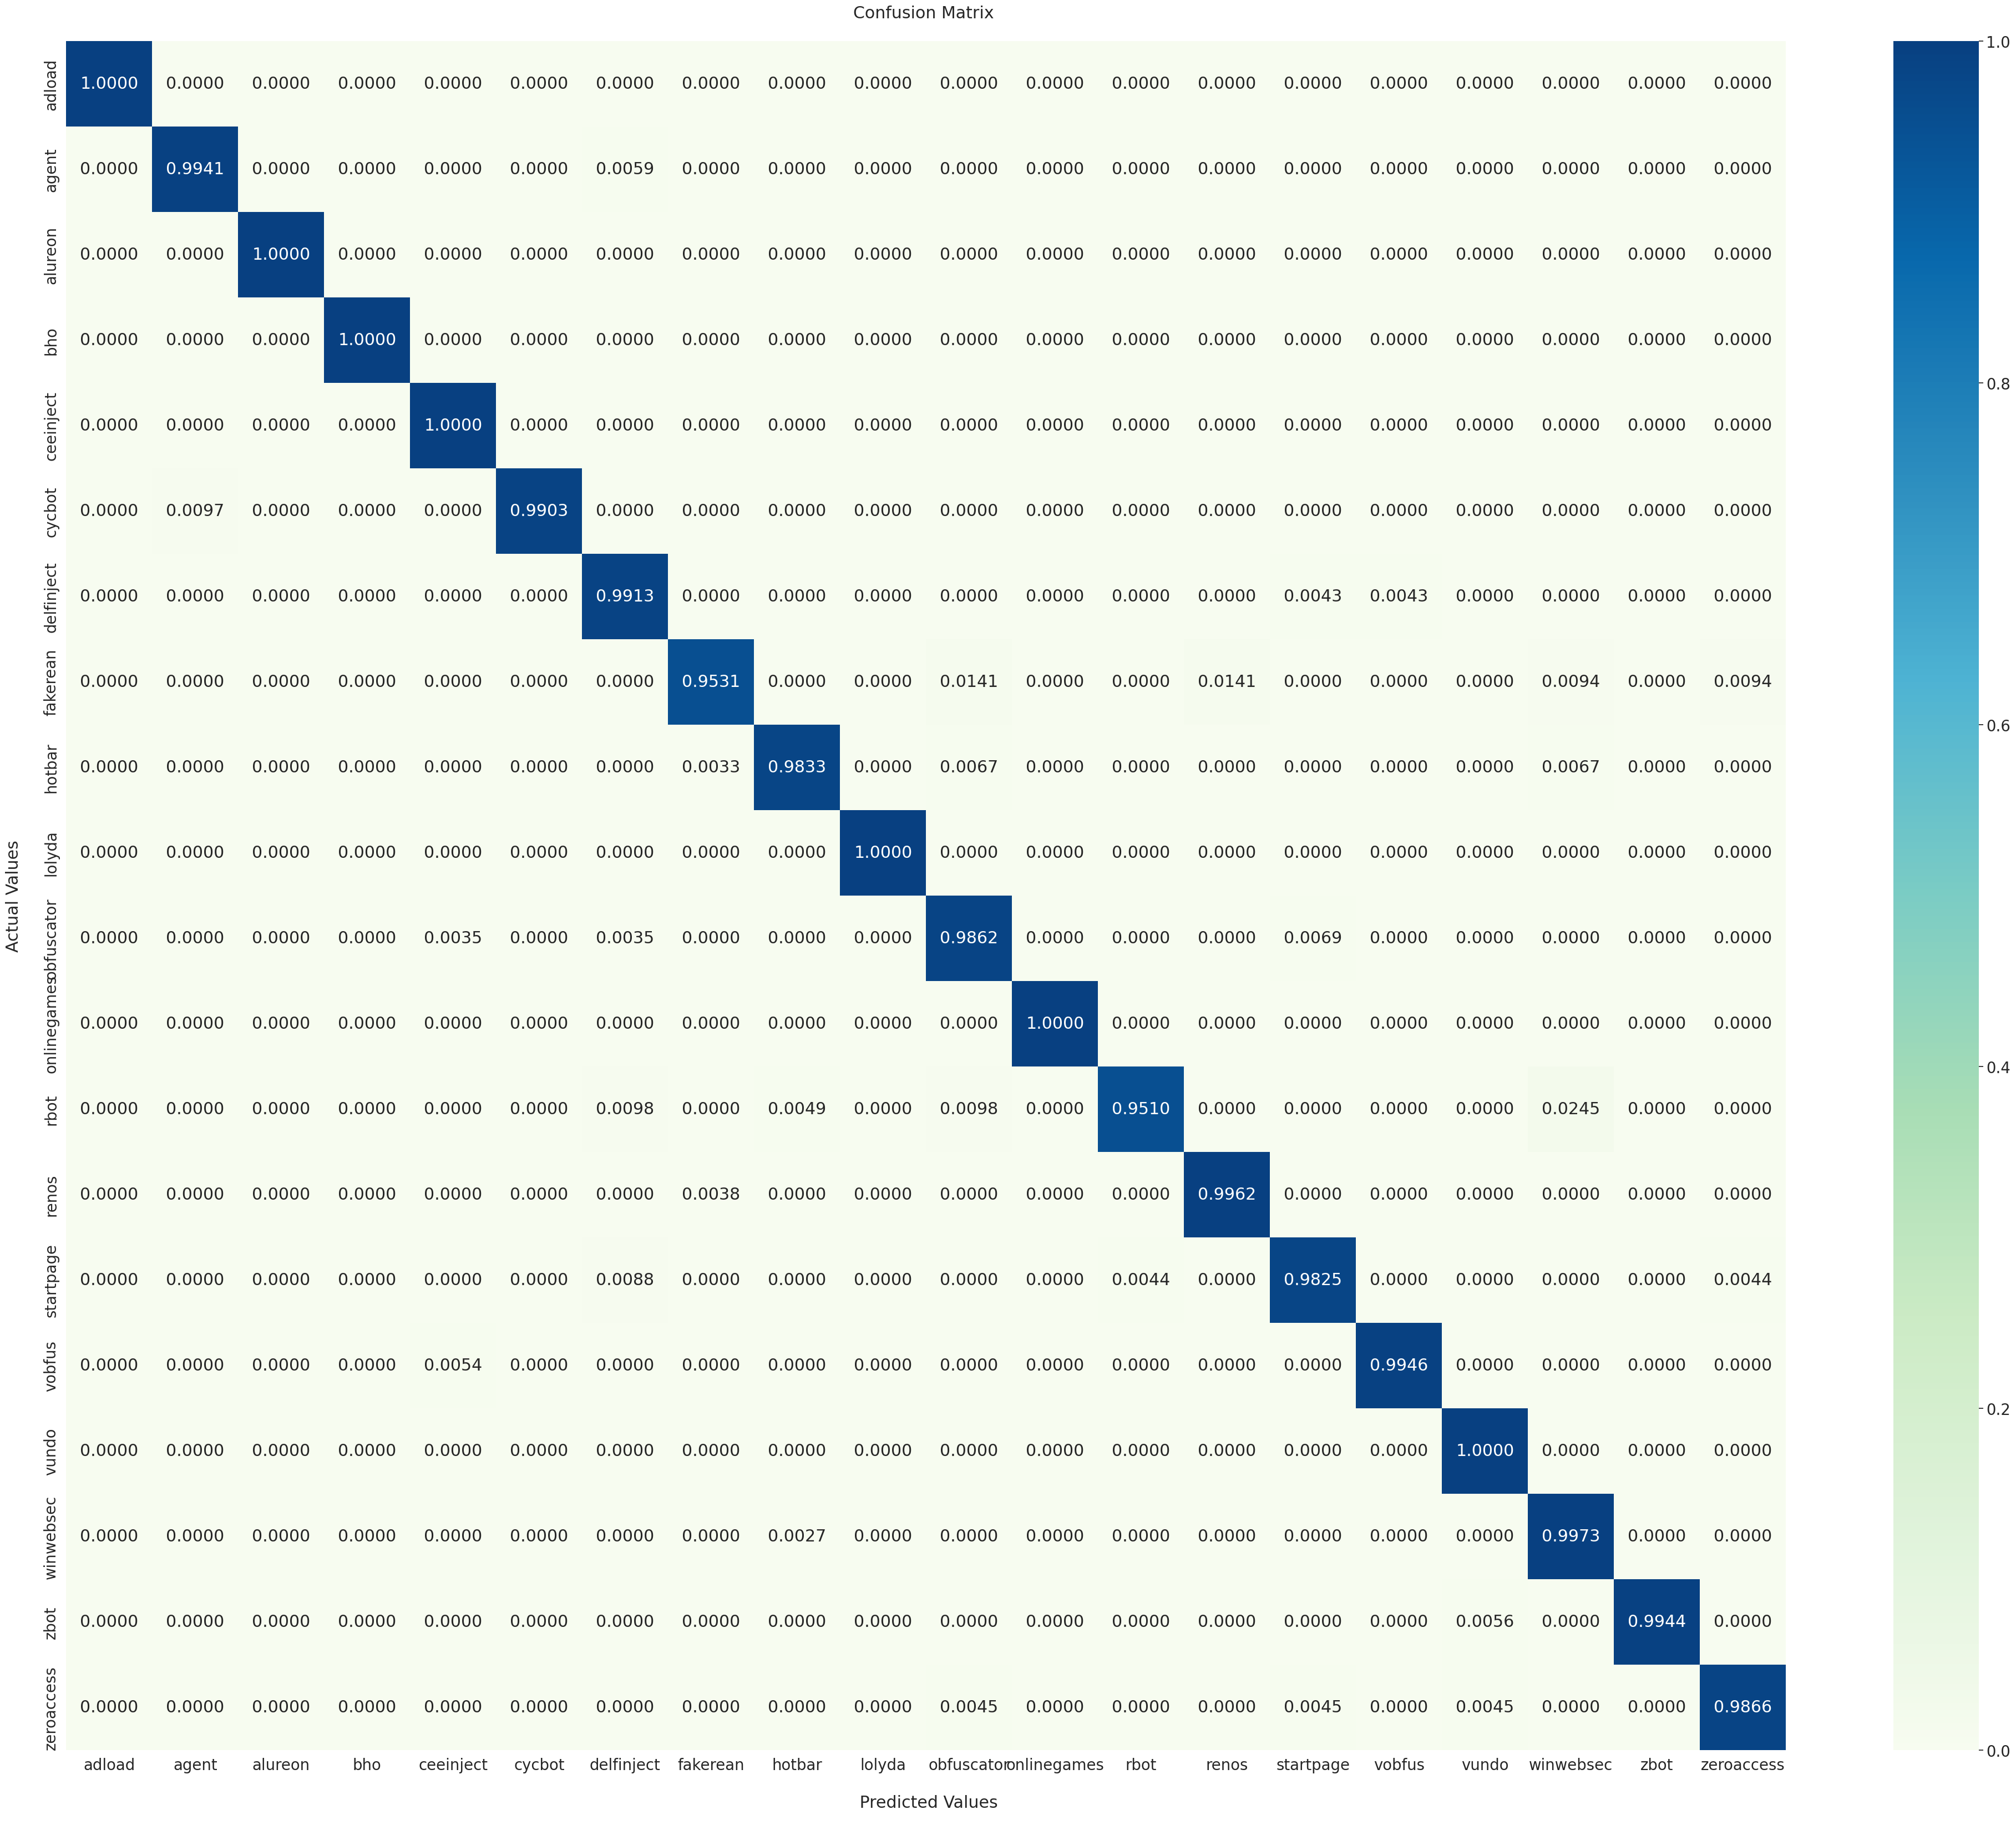

In [ ]:
# Visualizing confusion matrix
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(test_labels, prediction_xgb)
print(cm)
cm = confusion_matrix(test_labels, prediction_xgb,normalize='true')

plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
fx=sns.heatmap(cm, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [ ]:
f1_micro = f1_score(test_labels, prediction_xgb, average='micro')
print("Micro-Averaged F1 Score:", f1_micro)

f1_macro = f1_score(test_labels, prediction_xgb, average='macro')
print("Macro-Averaged F1 Score:", f1_macro)

accuracy = accuracy_score(test_labels, prediction_xgb)
print("Accuracy:", accuracy)

precision_micro = precision_score(test_labels, prediction_xgb, average='micro')
print("Micro-Averaged Precision:", precision_micro)

precision_macro = precision_score(test_labels, prediction_xgb, average='macro')
print("Macro-Averaged Precision:", precision_macro)

recall_micro = recall_score(test_labels, prediction_xgb, average='micro')
print("Micro-Averaged Recall:", recall_micro)

recall_macro = recall_score(test_labels, prediction_xgb, average='macro')
print("Macro-Averaged Recall:", recall_macro)

**SVM**

In [ ]:
#SVM

In [ ]:
#Import svm model
from sklearn import svm
svm_model = svm.SVC(kernel='linear') # Linear Kernel
svm_model.fit(X_features, y_train) #For sklearn no one hot encoding

In [ ]:
#Send test data through same feature extractor process
X_test_feature = resnet.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

166/166 [==============================] - 5s 33ms/step


In [ ]:
# Now predict using the trained svm model.
prediction_svm = svm_model.predict(X_test_features)
# Inverse le transform to get original label back.
prediction_svm = le.inverse_transform(prediction_svm)
print(prediction_svm)



['startpage' 'startpage' 'startpage' ... 'lolyda' 'lolyda' 'lolyda']


In [ ]:
from sklearn import metrics
print("Accuracy SVM= ", metrics.accuracy_score(test_labels, prediction_svm))


Accuracy SVM=  0.9973544973544973


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, prediction_svm))

              precision    recall  f1-score   support

      adload       1.00      1.00      1.00       210
       agent       0.99      1.00      0.99       169
     alureon       1.00      1.00      1.00       266
         bho       1.00      1.00      1.00       236
   ceeinject       1.00      1.00      1.00       179
      cycbot       1.00      0.99      1.00       206
  delfinject       1.00      1.00      1.00       230
    fakerean       1.00      1.00      1.00       213
      hotbar       1.00      1.00      1.00       299
      lolyda       1.00      1.00      1.00       183
  obfuscator       1.00      1.00      1.00       289
 onlinegames       1.00      1.00      1.00       259
        rbot       1.00      0.98      0.99       204
       renos       1.00      1.00      1.00       263
   startpage       0.99      0.99      0.99       228
      vobfus       1.00      1.00      1.00       186
       vundo       1.00      1.00      1.00       359
   winwebsec       0.99    

In [ ]:
f1_micro = f1_score(test_labels, prediction_svm, average='micro')
print("Micro-Averaged F1 Score:", f1_micro)

f1_macro = f1_score(test_labels, prediction_svm, average='macro')
print("Macro-Averaged F1 Score:", f1_macro)

accuracy = accuracy_score(test_labels, prediction_svm)
print("Accuracy:", accuracy)

precision_micro = precision_score(test_labels, prediction_svm, average='micro')
print("Micro-Averaged Precision:", precision_micro)

precision_macro = precision_score(test_labels, prediction_svm, average='macro')
print("Macro-Averaged Precision:", precision_macro)

recall_micro = recall_score(test_labels, prediction_svm, average='micro')
print("Micro-Averaged Recall:", recall_micro)

recall_macro = recall_score(test_labels, prediction_svm, average='macro')
print("Macro-Averaged Recall:", recall_macro)

Micro-Averaged F1 Score: 0.9973544973544973
Macro-Averaged F1 Score: 0.9972041504337165
Accuracy: 0.9973544973544973
Micro-Averaged Precision: 0.9973544973544973
Macro-Averaged Precision: 0.997470952233285
Micro-Averaged Recall: 0.9973544973544973
Macro-Averaged Recall: 0.9969536960241978


**Random Forest**

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [ ]:
# Train the model on training data
RF_model.fit(X_features, y_train) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
#Send test data through same feature extractor process
X_test_feature = resnet.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

166/166 [==============================] - 5s 31ms/step


In [ ]:
#Now predict using the trained RF model.
prediction_RF = RF_model.predict(X_test_features)

In [ ]:
#Inverse le transform to get original label back.
prediction_RF = le.inverse_transform(prediction_RF)
prediction_RF

array(['startpage', 'startpage', 'startpage', ..., 'lolyda', 'lolyda',
       'lolyda'], dtype='<U11')

In [ ]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

Accuracy =  0.9824263038548753


In [ ]:
f1_micro = f1_score(test_labels, prediction_RF, average='micro')
print("Micro-Averaged F1 Score:", f1_micro)

f1_macro = f1_score(test_labels, prediction_RF, average='macro')
print("Macro-Averaged F1 Score:", f1_macro)

accuracy = accuracy_score(test_labels, prediction_RF)
print("Accuracy:", accuracy)

precision_micro = precision_score(test_labels, prediction_RF, average='micro')
print("Micro-Averaged Precision:", precision_micro)

precision_macro = precision_score(test_labels, prediction_RF, average='macro')
print("Macro-Averaged Precision:", precision_macro)

recall_micro = recall_score(test_labels, prediction_RF, average='micro')
print("Micro-Averaged Recall:", recall_micro)

recall_macro = recall_score(test_labels, prediction_RF, average='macro')
print("Macro-Averaged Recall:", recall_macro)

Micro-Averaged F1 Score: 0.9824263038548753
Macro-Averaged F1 Score: 0.9820370781856415
Accuracy: 0.9824263038548753
Micro-Averaged Precision: 0.9824263038548753
Macro-Averaged Precision: 0.9844300924195959
Micro-Averaged Recall: 0.9824263038548753
Macro-Averaged Recall: 0.9799879469495038


# **DNN**

In [ ]:
import keras
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
from tensorflow import keras
from tensorflow.keras.applications import ResNet50

def build_model(hp):

    model_1 = Sequential()

    resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

    # Freeze the weights of all layers in the ResNet50 model
    for layer in resnet.layers:
        layer.trainable = False

    # Add the ResNet50 model to your own model
    model_1.add(resnet)


    # Add the flatten layer
    model_1.add(Flatten())

    # Add the dense layer
    model_1.add(Dense(units=hp.Int('dense_units', min_value=32, max_value=512, step=32),
                    activation='relu'))

    model_1.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))

    # Add the output layer
    model_1.add(Dense(units=20, activation='softmax'))

    # Compile the model
    model_1.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model_1


In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=4,
    executions_per_trial=2,
    directory='/content/drive/MyDrive/malware_classification/Mark_stamp/hex_img/Tuned_model',
    project_name='resnet'
)

In [ ]:
tuner.search(x_train, y_train_one_hot,
             epochs=10,
             validation_data=(x_test, y_test_one_hot))

# tuner.search(x_train,y_train,epochs=3,validation_split=0.1)

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
# best_model

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 160)               1310880   
                                                                 
 dropout (Dropout)           (None, 160)               0         
                                                                 
 dense_1 (Dense)             (None, 20)                3220      
                                                                 
Total params: 24,901,812
Trainable params: 1,314,100
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
# best_hyperparameters

In [ ]:
# re-tranining the model

history = best_model.fit(x_train, y_train_one_hot, epochs=12,validation_data=(x_test, y_test_one_hot),initial_epoch=3)

Epoch 4/12
661/661 [==============================] - 39s 36ms/step - loss: 0.4352 - accuracy: 0.8727 - val_loss: 0.2433 - val_accuracy: 0.9592
Epoch 5/12
661/661 [==============================] - 12s 19ms/step - loss: 0.3963 - accuracy: 0.8830 - val_loss: 0.2078 - val_accuracy: 0.9535
Epoch 6/12
661/661 [==============================] - 12s 19ms/step - loss: 0.3647 - accuracy: 0.8912 - val_loss: 0.1964 - val_accuracy: 0.9467
Epoch 7/12
661/661 [==============================] - 12s 19ms/step - loss: 0.3370 - accuracy: 0.8969 - val_loss: 0.1652 - val_accuracy: 0.9735
Epoch 8/12
661/661 [==============================] - 12s 19ms/step - loss: 0.3143 - accuracy: 0.9034 - val_loss: 0.1711 - val_accuracy: 0.9647
Epoch 9/12
661/661 [==============================] - 14s 21ms/step - loss: 0.2963 - accuracy: 0.9074 - val_loss: 0.1744 - val_accuracy: 0.9609
Epoch 10/12
661/661 [==============================] - 13s 19ms/step - loss: 0.2815 - accuracy: 0.9113 - val_loss: 0.1272 - val_accuracy

In [ ]:
result = best_model.evaluate(x_test,y_test_one_hot)

# model loss and accuracy
print("model loss:",result[0])
print("model accuracy",result[1])

166/166 [==============================] - 3s 15ms/step - loss: 0.1145 - accuracy: 0.9720
model loss: 0.1144934892654419
model accuracy 0.9720332622528076


In [ ]:
#  Comparing the accuracy and loss by plotting the graph for training and validation.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

<Figure size 640x480 with 0 Axes>

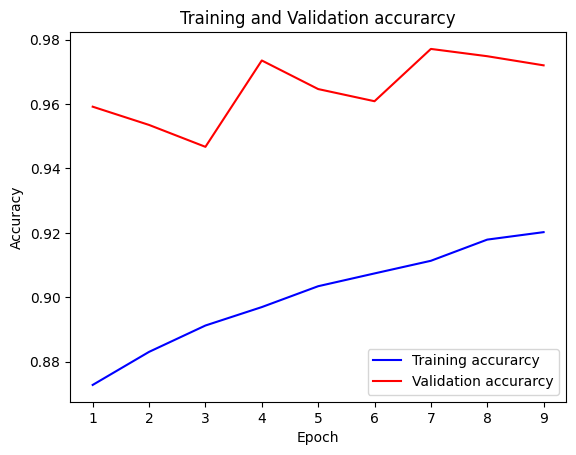

<Figure size 640x480 with 0 Axes>

In [ ]:
# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()

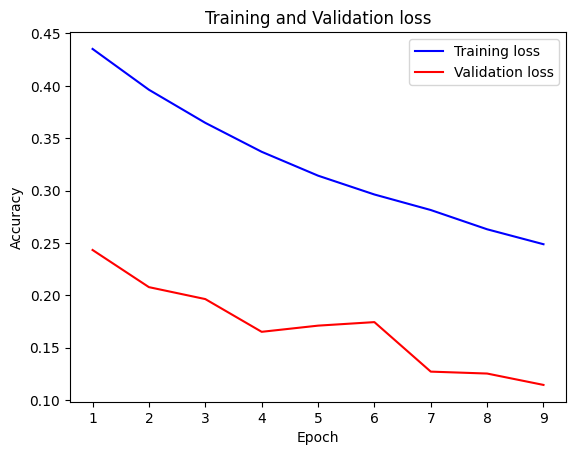

In [ ]:
# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
prediction_NN = best_model.predict(x_test)
# print(prediction_NN)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

166/166 [==============================] - 4s 13ms/step


[[210   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0 157   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   5
    7   0]
 [  0   0 266   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   6 230   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0  15 163   0   0   0   0   0   0   0   0   0   0   1   0   0
    0   0]
 [  0  14   0   0   0 192   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 210   0   0   0   0   5   0   0   0  15   0   0
    0   0]
 [  0   0   0   0   0   0   0 213   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0 279   0   0   0   0   3   0   0   0  17
    0   0]
 [  0   0   0   0   0   4   0   0   0 179   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   1   0   0   0   0 287   0   0   0   0   0   0   1
    0   0]
 [  8   0   1   0   0   0   0   0   0   0   0 250   0   0   0   0

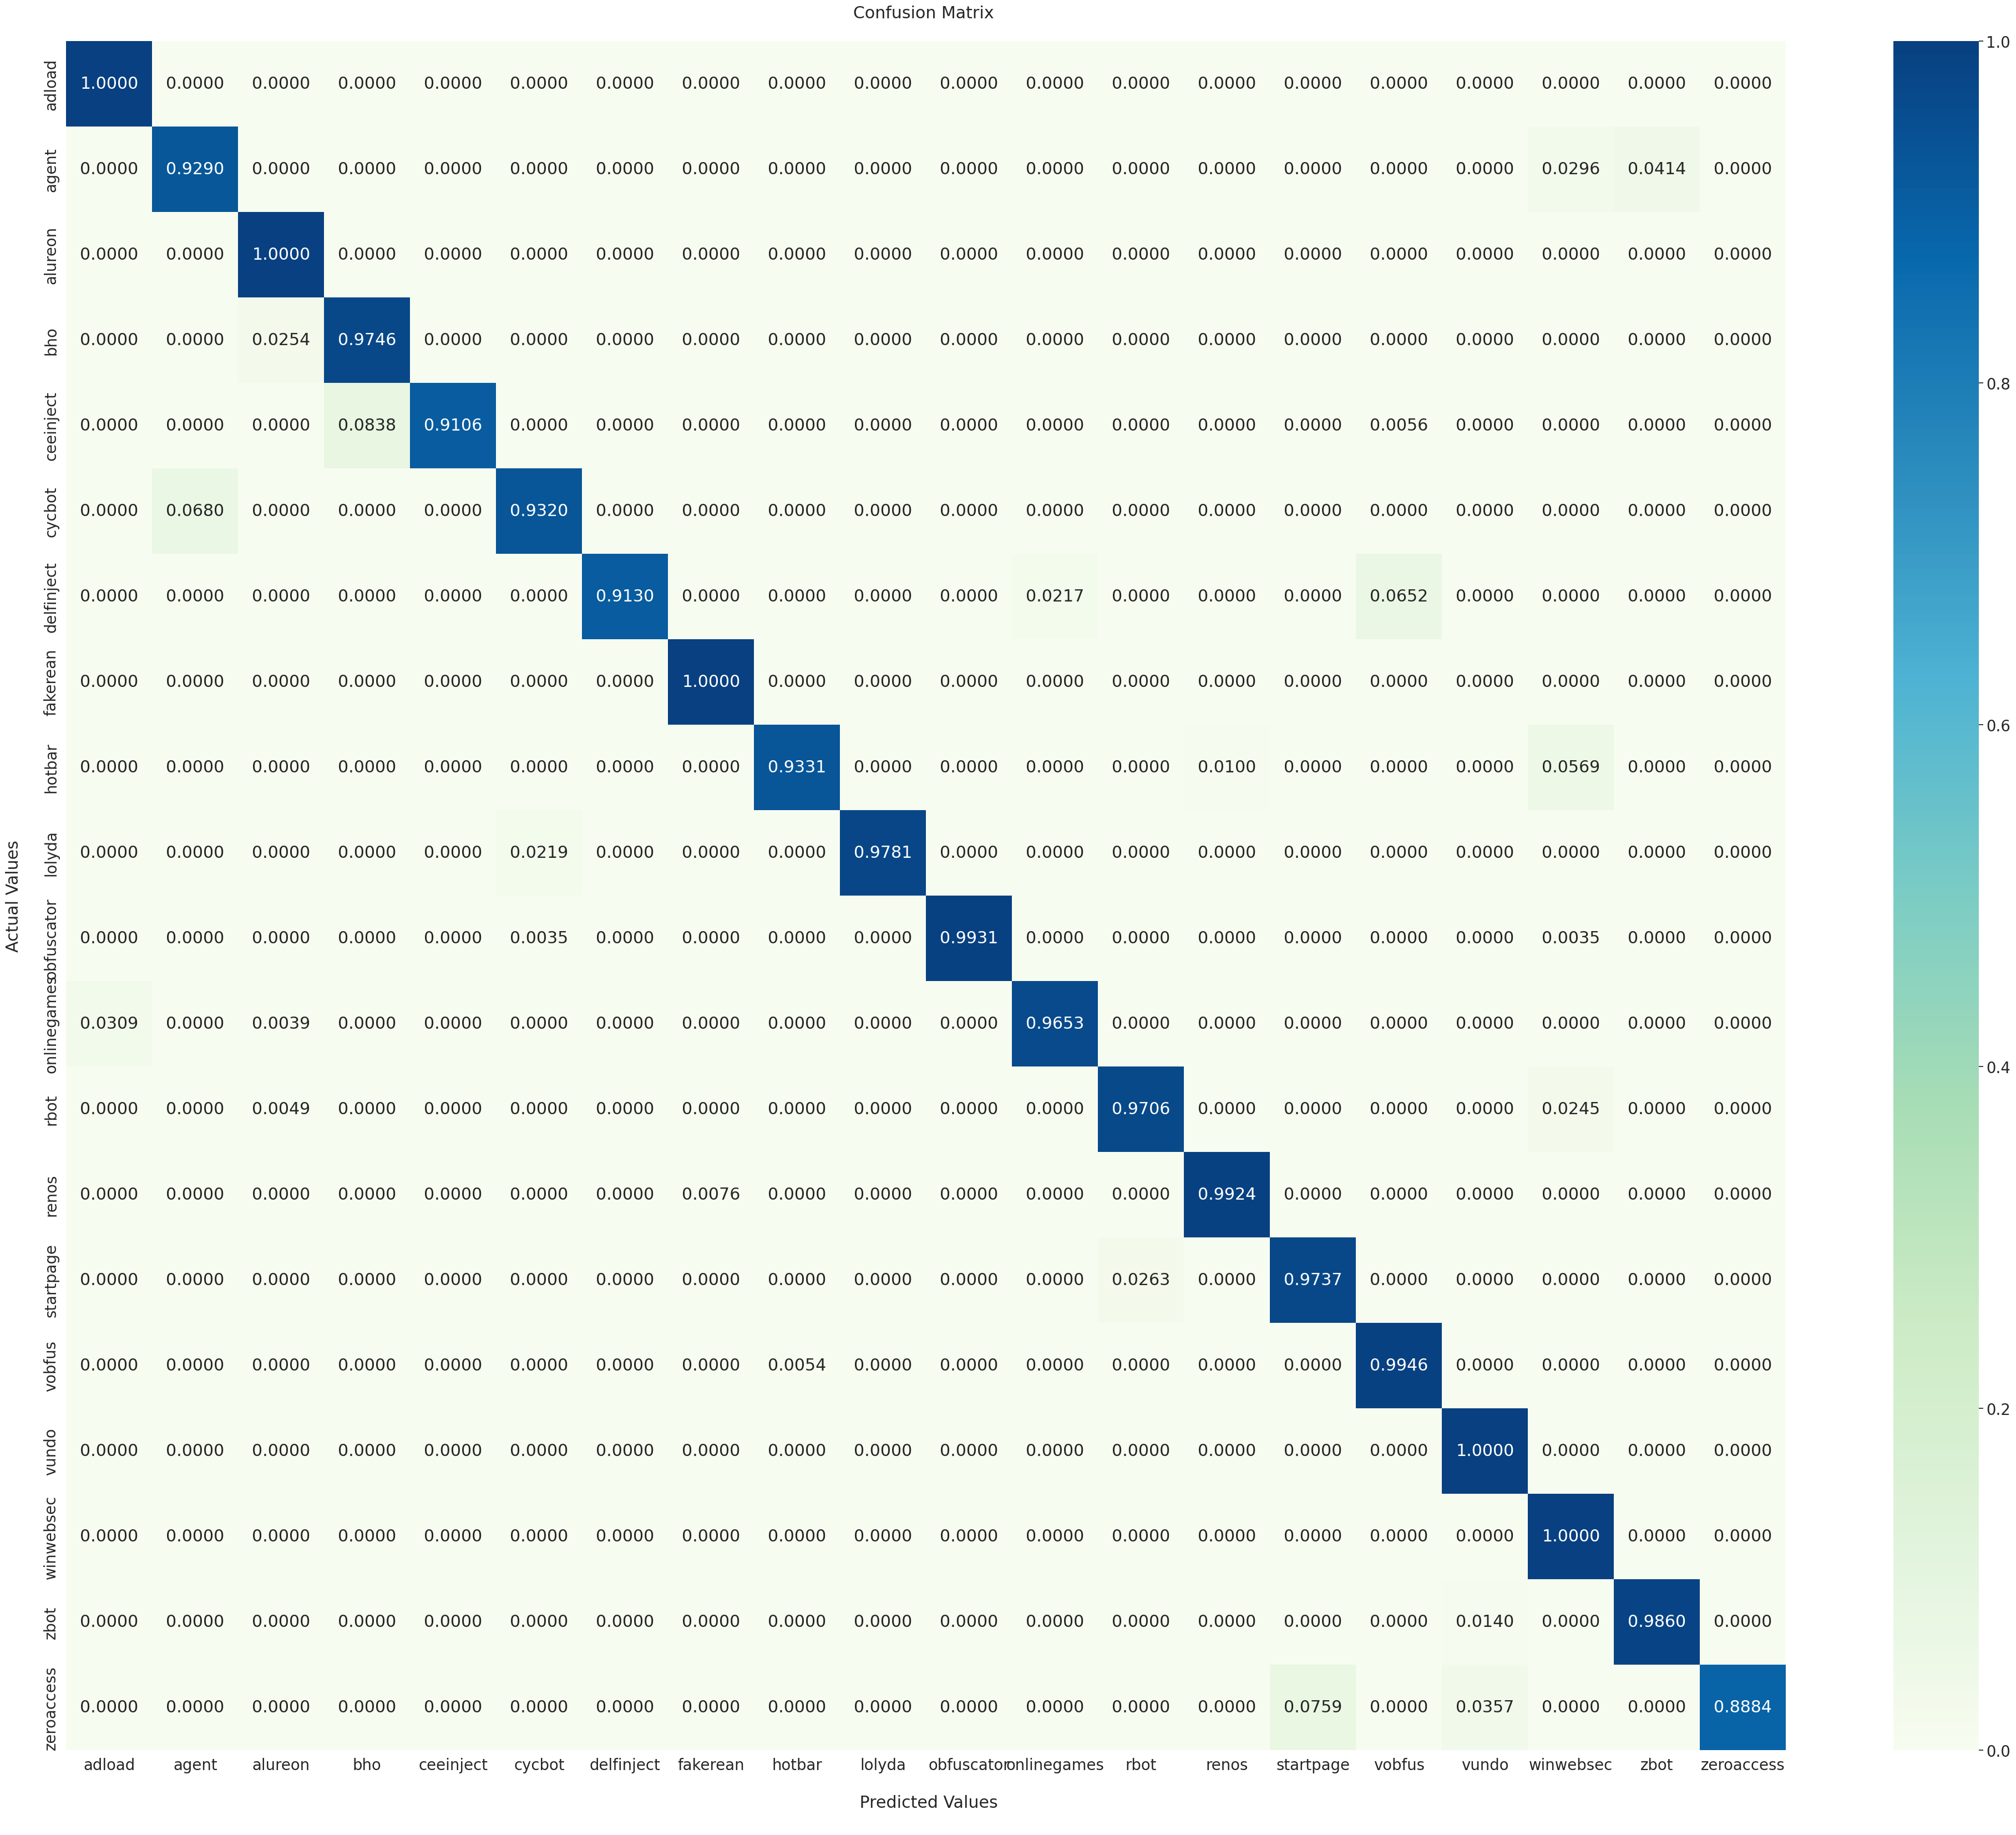

In [ ]:
# Visualizing confusion matrix
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
cm = confusion_matrix(test_labels, prediction_NN,normalize='true')

plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
fx=sns.heatmap(cm, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, prediction_NN))

              precision    recall  f1-score   support

      adload       0.96      1.00      0.98       210
       agent       0.92      0.93      0.92       169
     alureon       0.97      1.00      0.99       266
         bho       0.94      0.97      0.96       236
   ceeinject       1.00      0.91      0.95       179
      cycbot       0.97      0.93      0.95       206
  delfinject       1.00      0.91      0.95       230
    fakerean       0.99      1.00      1.00       213
      hotbar       1.00      0.93      0.96       299
      lolyda       1.00      0.98      0.99       183
  obfuscator       1.00      0.99      1.00       289
 onlinegames       0.98      0.97      0.97       259
        rbot       0.97      0.97      0.97       204
       renos       0.99      0.99      0.99       263
   startpage       0.93      0.97      0.95       228
      vobfus       0.92      0.99      0.96       186
       vundo       0.97      1.00      0.98       359
   winwebsec       0.96    

# **Fusion**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.layers import Input, Dense, concatenate,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

inp_ = layers.Input(shape=(128,128,3))

# Designing two cnn models
cnn11 = layers.Conv2D(64,(3,3),padding = 'same', activation='relu')(inp_)
mxp11 = layers.MaxPooling2D(2,2)(cnn11)

cnn11 = layers.Conv2D(64,(3,3),padding = 'same', activation='relu')(mxp11)
mxp11 = layers.MaxPooling2D(2,2)(cnn11)

cnn11 = layers.Conv2D(64,(3,3),padding = 'same', activation='relu')(mxp11)
mxp11 = layers.MaxPooling2D(2,2)(cnn11)

cnn11 = layers.Flatten()(mxp11)

print(cnn11.shape)

resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(128,128,3))

for layer in resnet.layers:
    layer.trainable = False


resnet_output = resnet(inp_)

resnet11 = Flatten()(resnet_output)

print(resnet11.shape)

(None, 16384)
(None, 32768)


In [ ]:
# Merging the two models
merge_ = layers.concatenate([cnn11, resnet11])
out_p = layers.Dense(224, activation='relu')(merge_)
out_p = layers.Dense(20, activation='softmax')(out_p)
merged_model = keras.Model(inputs=inp_, outputs=out_p, name='merge_')

merged_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
merged_model.summary()

Model: "merge_"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 64, 64, 64)           36928     ['max_pooling2d[0][0]']  

In [ ]:
#tranining the model
history = merged_model.fit(x_train, y_train_one_hot, epochs=10,validation_data=(x_test, y_test_one_hot))

Epoch 1/10
662/662 [==============================] - 60s 71ms/step - loss: 2.2264 - accuracy: 0.3310 - val_loss: 0.0566 - val_accuracy: 0.9826
Epoch 2/10
662/662 [==============================] - 43s 65ms/step - loss: 0.0277 - accuracy: 0.9920 - val_loss: 0.0347 - val_accuracy: 0.9881
Epoch 3/10
662/662 [==============================] - 44s 66ms/step - loss: 0.0115 - accuracy: 0.9965 - val_loss: 0.0029 - val_accuracy: 0.9991
Epoch 4/10
662/662 [==============================] - 43s 66ms/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.0065 - val_accuracy: 0.9974
Epoch 5/10
662/662 [==============================] - 43s 66ms/step - loss: 0.0069 - accuracy: 0.9979 - val_loss: 0.0016 - val_accuracy: 0.9994
Epoch 6/10
662/662 [==============================] - 44s 67ms/step - loss: 0.0085 - accuracy: 0.9979 - val_loss: 0.0019 - val_accuracy: 0.9991
Epoch 7/10
662/662 [==============================] - 44s 66ms/step - loss: 0.0061 - accuracy: 0.9984 - val_loss: 0.0057 - val_accuracy:

In [ ]:
result = merged_model.evaluate(x_test,y_test_one_hot)

# model loss and accuracy
print("model loss:",result[0])
print("model accuracy",result[1])

166/166 [==============================] - 7s 41ms/step - loss: 0.0025 - accuracy: 0.9989
model loss: 0.0024953861720860004
model accuracy 0.9988662004470825


In [ ]:
prediction = merged_model.evaluate(x_test, y_test_one_hot , verbose=0)
print("%s: %.2f%%" % (merged_model.metrics_names[1], prediction[1]*100))


accuracy: 99.89%


In [ ]:
merged_model.save('/content/drive/MyDrive/Malware/Merged_model_128x128_Malhub.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import time

start_time = time.time()
predictions = merged_model.predict(x_test)
end_time = time.time()
prediction_time = end_time - start_time
print("Prediction time:", prediction_time, "seconds")

166/166 [==============================] - 7s 39ms/step
Prediction time: 10.285269021987915 seconds


1/1 [==============================] - 0s 390ms/step
Prediction time: 0.4308044910430908 seconds
The prediction for this image is:  ['startpage']
The actual label for this image is:  startpage


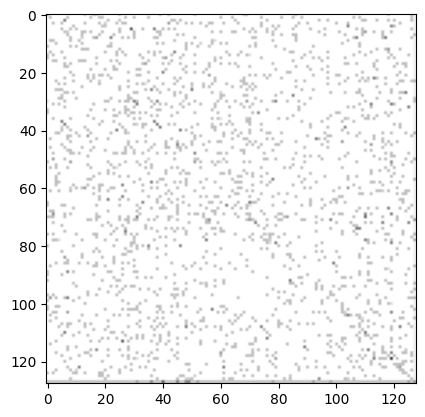

In [ ]:
n=9  #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
start_time = time.time()
prediction = np.argmax(merged_model.predict(input_img))  #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
end_time = time.time()
prediction_time = end_time - start_time
print("Prediction time:", prediction_time, "seconds")
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_one_hot, axis=1)

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [ ]:
f1_micro = f1_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged F1 Score:", f1_micro)

f1_macro = f1_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged F1 Score:", f1_macro)

accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)

precision_micro = precision_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Precision:", precision_micro)

precision_macro = precision_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Precision:", precision_macro)

recall_micro = recall_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Recall:", recall_micro)

recall_macro = recall_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Recall:", recall_macro)

Micro-Averaged F1 Score: 0.9988662131519275
Macro-Averaged F1 Score: 0.9987539952447634
Accuracy: 0.9988662131519275
Micro-Averaged Precision: 0.9988662131519275
Macro-Averaged Precision: 0.9989309933234386
Micro-Averaged Recall: 0.9988662131519275
Macro-Averaged Recall: 0.9985883609523581


In [ ]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
prediction_NN = merged_model.predict(x_test)
# print(prediction_NN)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

166/166 [==============================] - 6s 39ms/step


[[210   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0 169   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0 266   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0 236   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 179   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0 206   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 230   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0 210   0   0   0   0   0   2   0   0   0   1
    0   0]
 [  0   0   0   0   0   0   0   0 299   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0 183   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 289   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 259   0   0   0   0

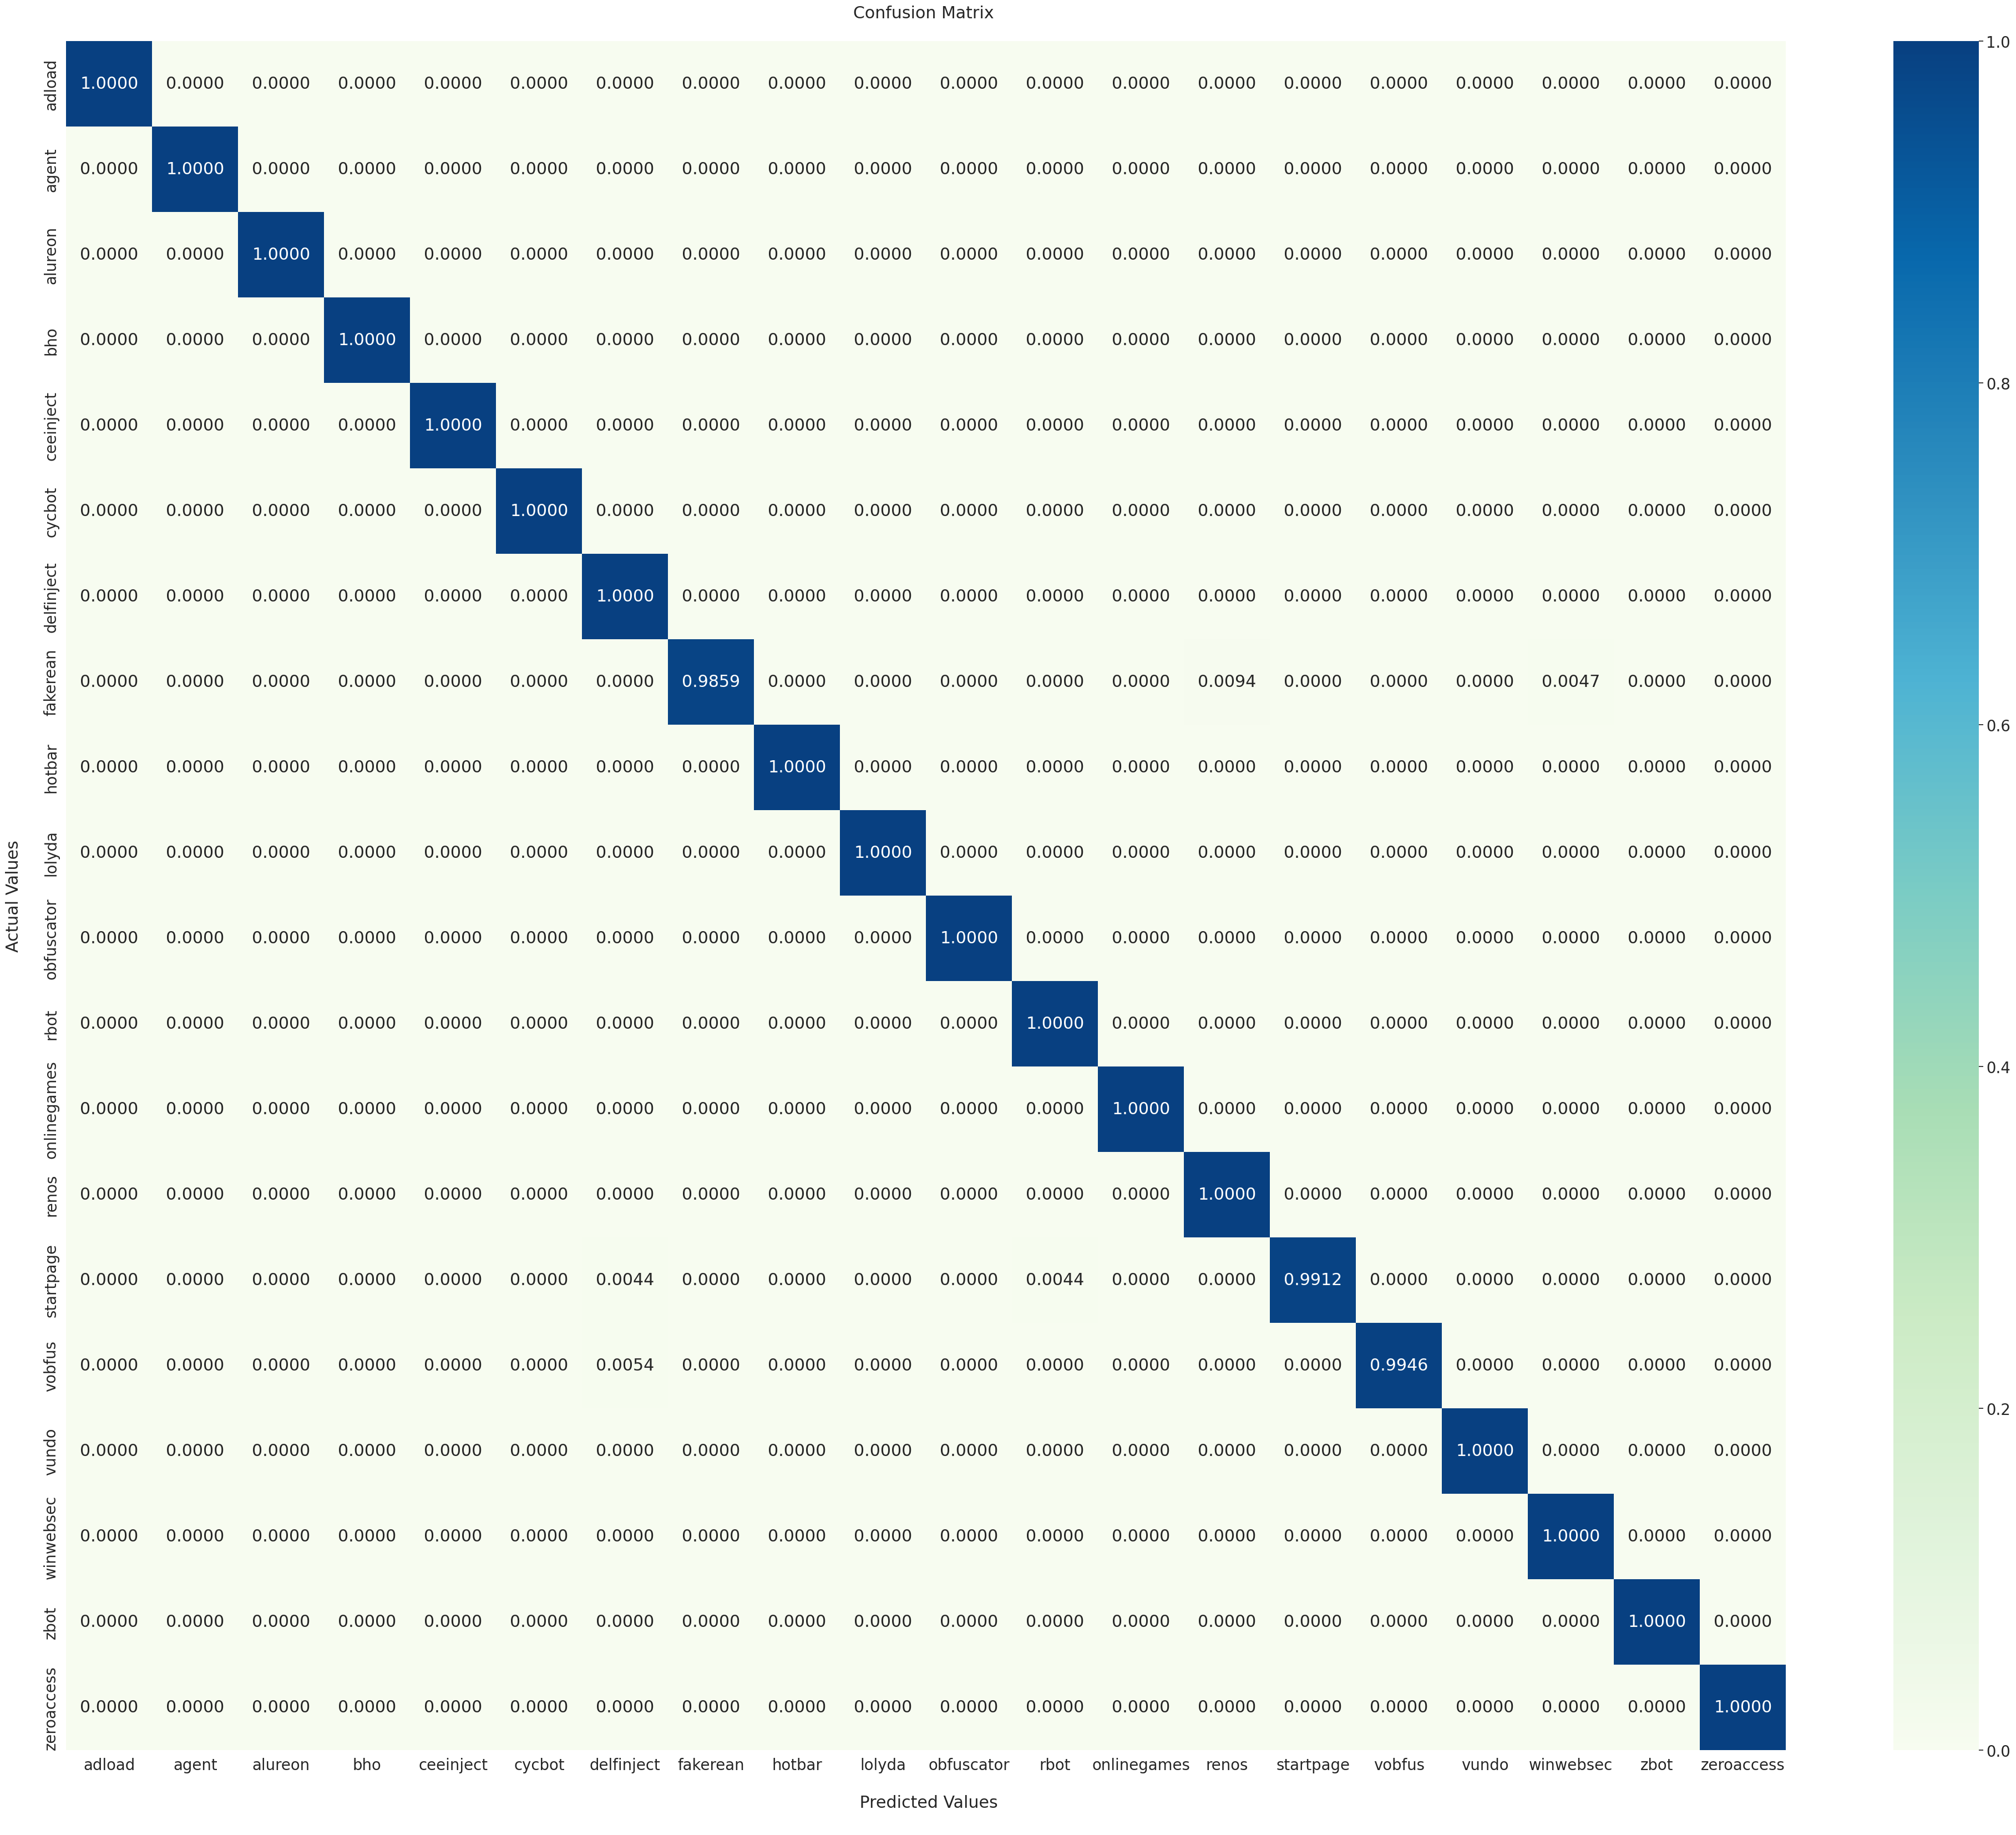

In [ ]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
cm = confusion_matrix(test_labels, prediction_NN,normalize='true')

plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
fx=sns.heatmap(cm, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)
plt.show()

# **ROC**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

166/166 [==============================] - 6s 37ms/step


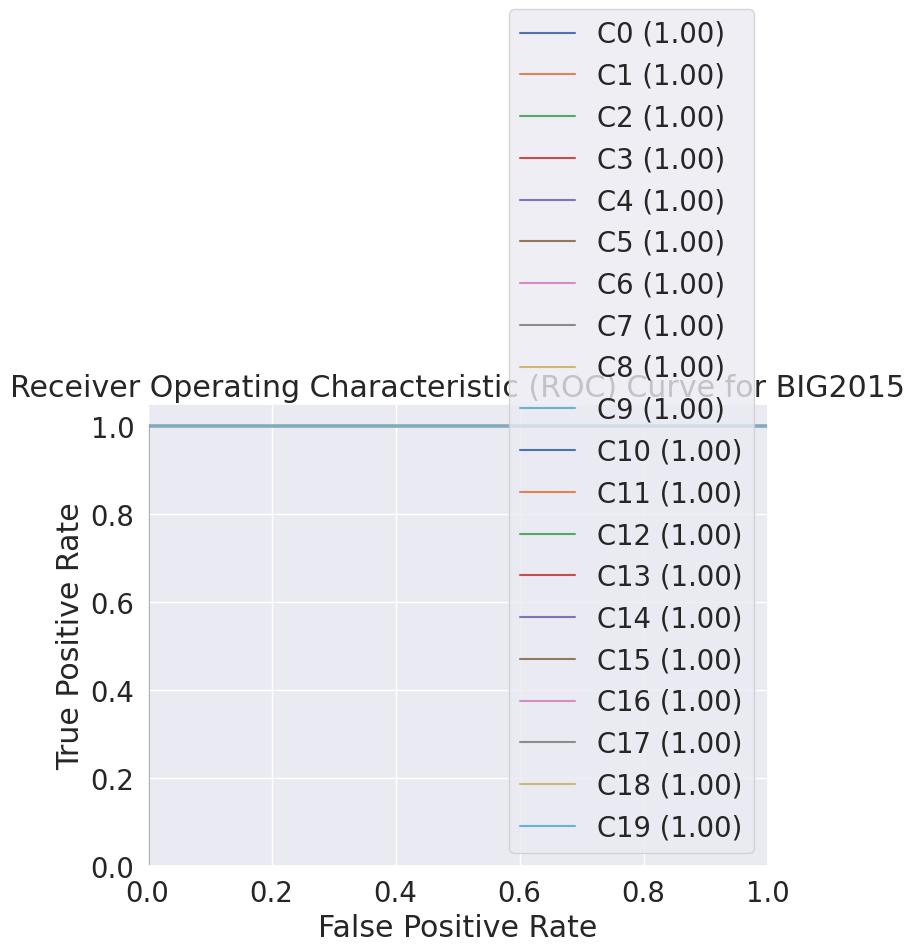

In [ ]:
true_labels = y_test_one_hot
prediction = merged_model.predict(x_test)
predicted_probs = prediction

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(20):
    fpr[i], tpr[i], _ = metrics.roc_curve(true_labels[:, i], predicted_probs[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(8, 6))

for i in range(20):
  #plt.plot(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], label=f'C{i} ({roc_auc[i]:.2f})')

#plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for BIG2015')
plt.legend(loc="lower right")
plt.show()

## **ResNet50+CNN+2DL-Max pooling**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Conv2D, GlobalMaxPooling2D, Input

In [ ]:
inp_ = Input(shape=(128,128,3))
# Load the pre-trained ResNet50 model

resnet = ResNet50(weights='imagenet', include_top=False, input_tensor=inp_)

# Create model
model_1 = tf.keras.models.Sequential()

# Adding the ResNet50 model to your own model
model_1.add(resnet)

# Adding three convolutional layers
model_1.add(Conv2D(96, (3, 3), padding='same', activation='relu'))

model_1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

model_1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

# Adding Global Average Pooling layer
model_1.add(GlobalMaxPooling2D())

# Adding two dense layers
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(64, activation='relu'))

num_classes = 20
model_1.add(Dense(num_classes, activation='softmax'))

In [ ]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 96)          1769568   
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          55360     
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 global_max_pooling2d (Glob  (None, 64)                0         
 alMaxPooling2D)                                                 
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                        

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model_1.fit(x_train, y_train_one_hot, epochs=40,callbacks=[early_stopping], validation_data=(x_test, y_test_one_hot))

Epoch 1/40
662/662 [==============================] - 118s 133ms/step - loss: 0.2778 - accuracy: 0.9263 - val_loss: 10.2404 - val_accuracy: 0.0346
Epoch 2/40
662/662 [==============================] - 85s 129ms/step - loss: 0.0843 - accuracy: 0.9834 - val_loss: 1.0641 - val_accuracy: 0.8122
Epoch 3/40
662/662 [==============================] - 87s 131ms/step - loss: 0.0571 - accuracy: 0.9892 - val_loss: 1.0289 - val_accuracy: 0.7239
Epoch 4/40
662/662 [==============================] - 86s 130ms/step - loss: 0.0484 - accuracy: 0.9892 - val_loss: 2.5730 - val_accuracy: 0.4703
Epoch 5/40
662/662 [==============================] - 87s 131ms/step - loss: 0.0318 - accuracy: 0.9940 - val_loss: 0.2190 - val_accuracy: 0.9369
Epoch 6/40
662/662 [==============================] - 86s 131ms/step - loss: 0.0511 - accuracy: 0.9910 - val_loss: 1.3559 - val_accuracy: 0.6364
Epoch 7/40
662/662 [==============================] - 86s 130ms/step - loss: 0.0368 - accuracy: 0.9932 - val_loss: 9.1241 - val_

In [ ]:
model_1.save('/content/drive/MyDrive/Malware/malhub_old_proposed_model_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
predictions = model_1.predict(x_test)

166/166 [==============================] - 6s 35ms/step


In [ ]:
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_one_hot, axis=1)

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [ ]:
f1_micro = f1_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged F1 Score:", f1_micro)

f1_macro = f1_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged F1 Score:", f1_macro)

accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)

precision_micro = precision_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Precision:", precision_micro)

precision_macro = precision_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Precision:", precision_macro)

recall_micro = recall_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Recall:", recall_micro)

recall_macro = recall_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Recall:", recall_macro)

Micro-Averaged F1 Score: 0.936885865457294
Macro-Averaged F1 Score: 0.9284267200271478
Accuracy: 0.936885865457294
Micro-Averaged Precision: 0.936885865457294
Macro-Averaged Precision: 0.9388818739989236
Micro-Averaged Recall: 0.936885865457294
Macro-Averaged Recall: 0.9347058970097912


In [ ]:
import time

start_time = time.time()
prediction_NN = model_1.predict(x_test)
end_time = time.time()
prediction_time = end_time - start_time
print("Prediction time:", prediction_time, "seconds")

# print(prediction_NN)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

166/166 [==============================] - 6s 35ms/step
Prediction time: 8.714371681213379 seconds


In [ ]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
import seaborn as sns


[[210   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0 126   0   0   0  27   0   0   0   2   2   0   0   0   0   4   0   0
    8   0]
 [  0   0 261   0   0   0   0   0   0   0   0   5   0   0   0   0   0   0
    0   0]
 [  0   0   0 236   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 176   0   0   0   0   0   0   0   0   0   0   3   0   0
    0   0]
 [  0   0   0   0   0 181   0   0   0  25   0   0   0   0   0   0   0   0
    0   0]
 [  1   0   0   0   0   3 142   1   0   0   0   8   0   0   0  72   0   0
    0   3]
 [  0   0   0   0   0   0   0 213   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   4   0   0   3   0   0 218  17   0   7   2   4   0  44   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0 183   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   3   0   0   0  25 261   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 259   0   0   0   0

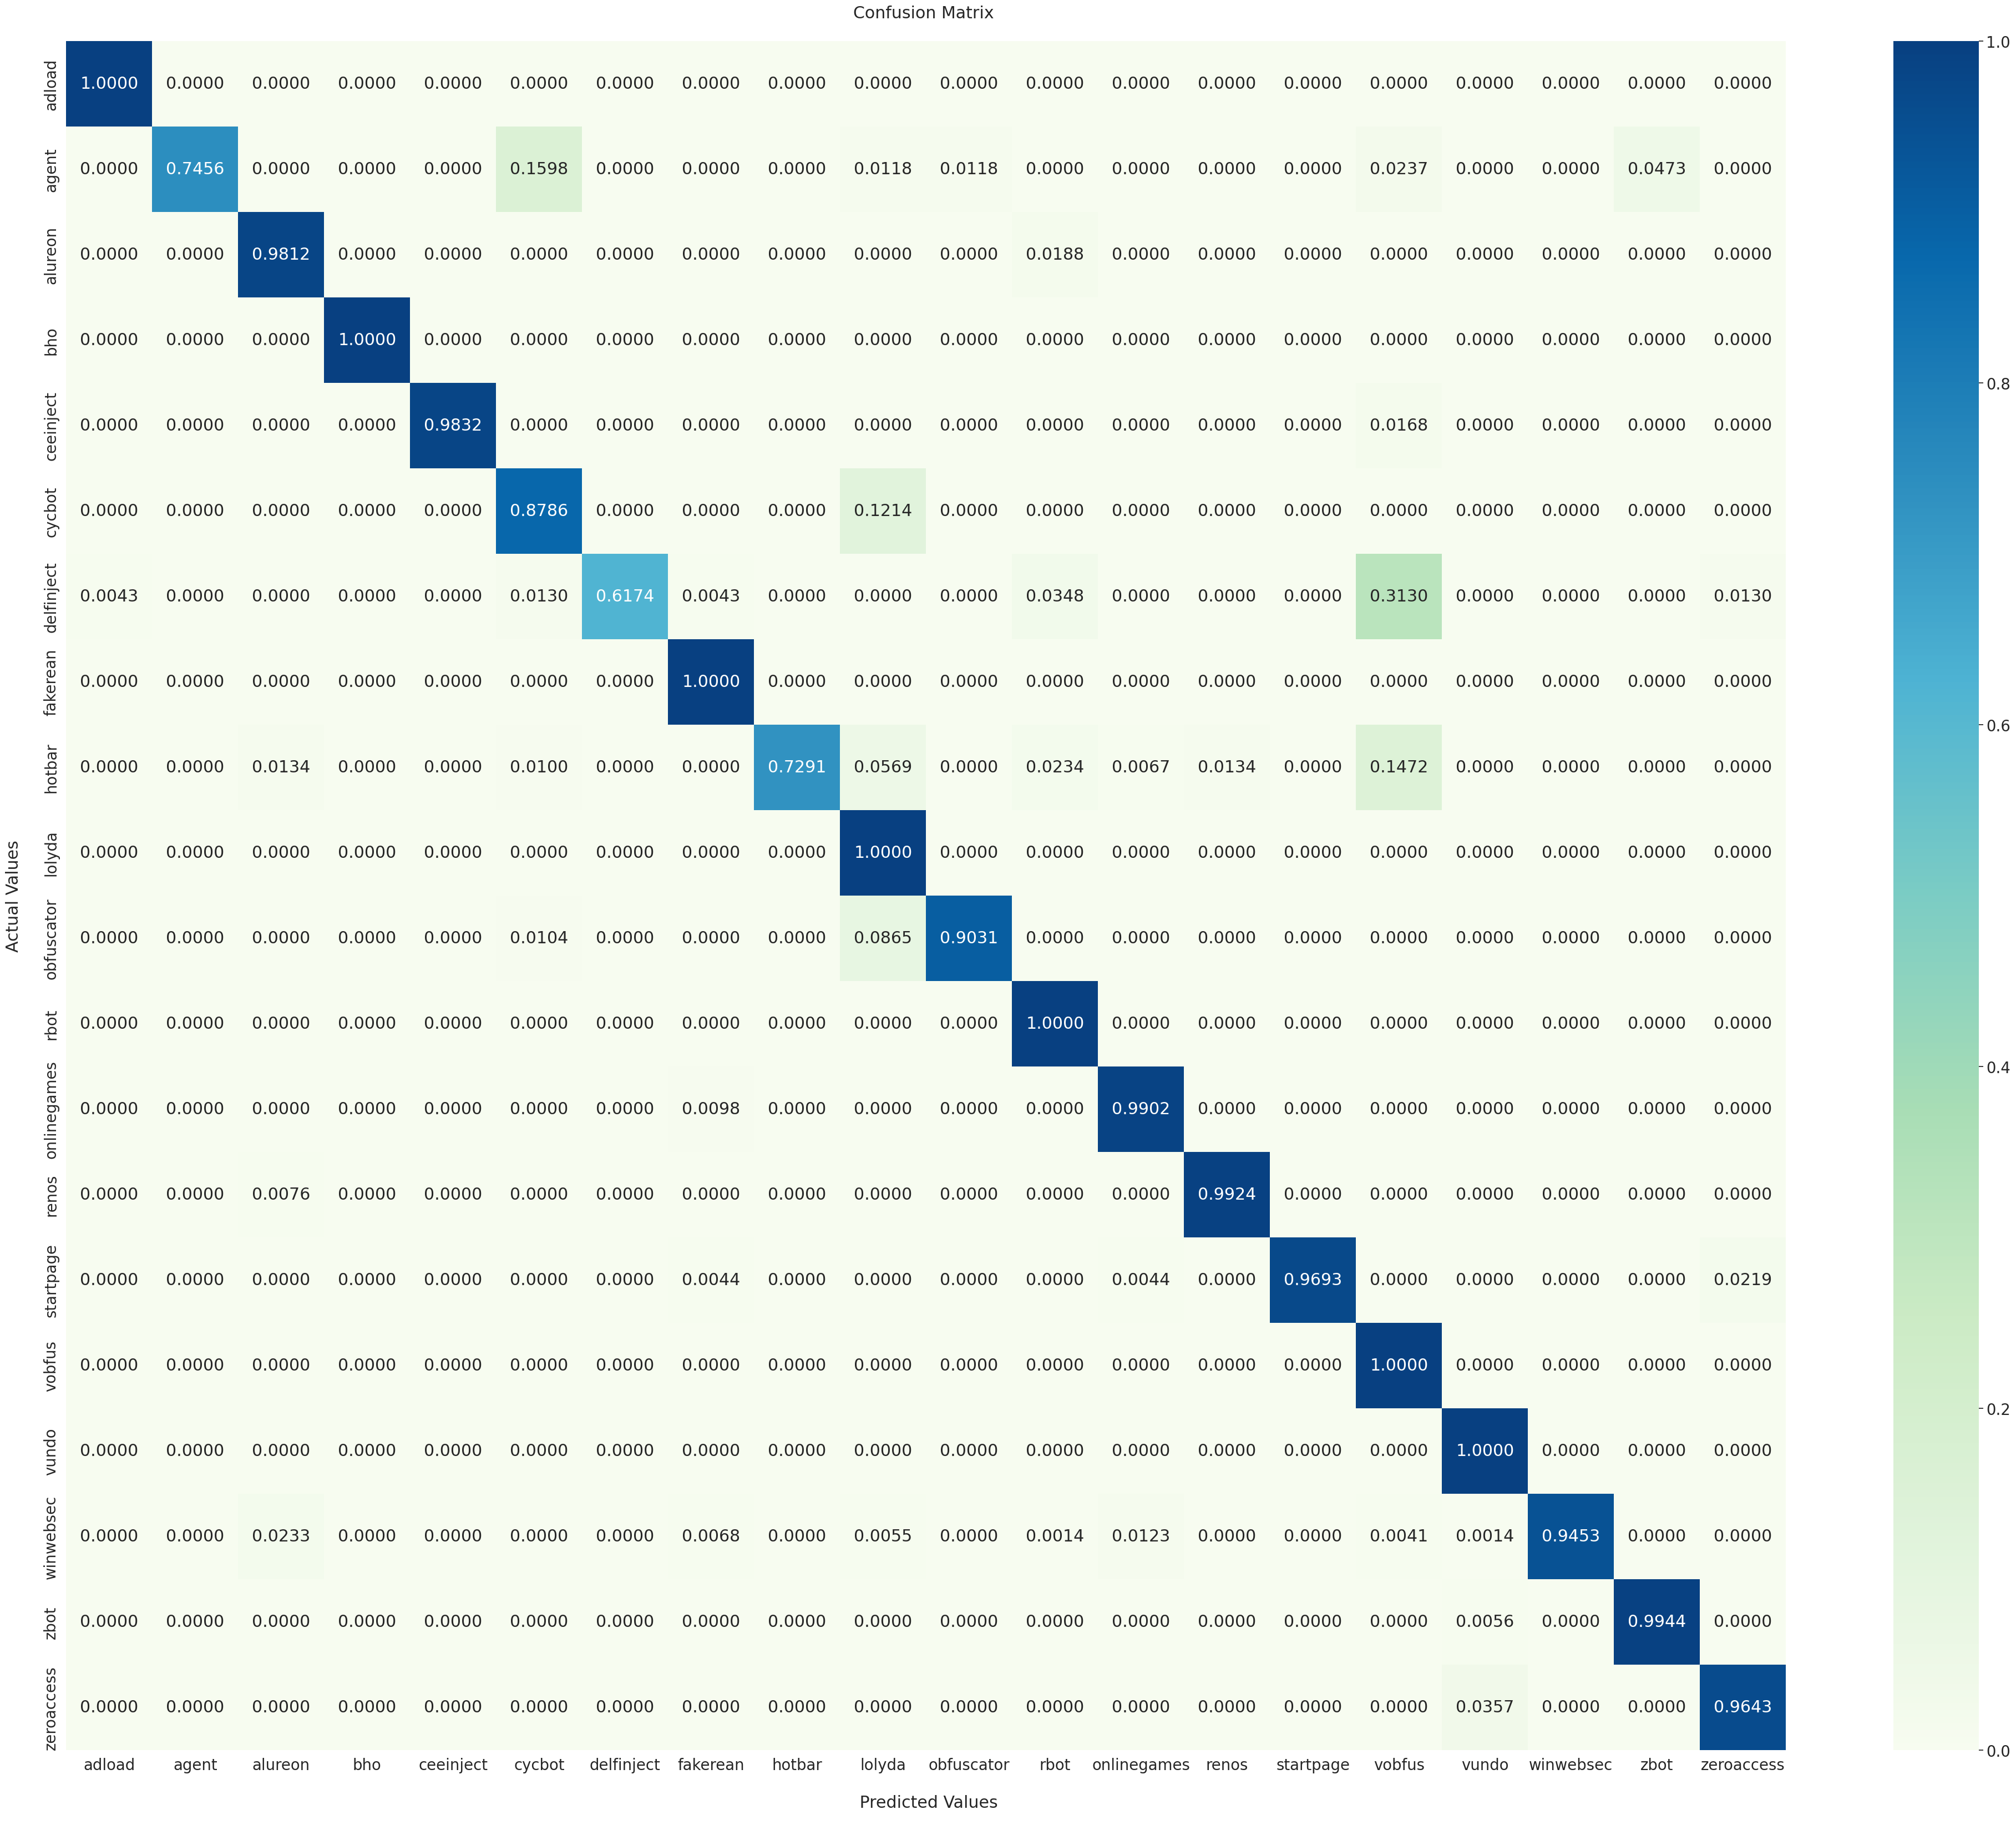

In [ ]:
# Visualizing confusion matrix
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
cm = confusion_matrix(test_labels, prediction_NN,normalize='true')

plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
fx=sns.heatmap(cm, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)
plt.show()